In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Cargamos el csv
df = pd.read_csv('lista_tomates.csv')

# ANALISIS EXPLORATORIO DE LOS DATOS

In [3]:
df.head()

,Cultivo,Ubicaciones,Rendimiento,Tamano,Fertilizantes
0,bola,El Ejido,8.01,1,True
1,de pera,Campohermoso,5.96,4,False
2,bola,La Mojonera,8.61,4,False
3,kumato,Nijar,9.85,4,True
4,rosa,El Ejido,9.17,4,False


In [4]:
#Revisamos la información básica del DataFrame, como el número de filas, columnas y tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cultivo        5000 non-null   object 
 1   Ubicaciones    5000 non-null   object 
 2   Rendimiento    5000 non-null   float64
 3   Tamano         5000 non-null   int64  
 4   Fertilizantes  5000 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 161.3+ KB


In [5]:
df.describe()

,Rendimiento,Tamano
count,5000.000000,5000.000000
mean,5.008944,2.476800
std,2.895066,1.115218
min,0.000000,1.000000
25%,2.490000,1.000000
50%,5.090000,2.000000
75%,7.510000,3.000000
max,9.990000,4.000000


In [6]:
df.isnull().sum()

Cultivo          0
Ubicaciones      0
Rendimiento      0
Tamano           0
Fertilizantes    0
dtype: int64

In [7]:
print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)

Cantidad de Filas y columnas: (5000, 5)
Nombre columnas: Index(['Cultivo', 'Ubicaciones', 'Rendimiento', 'Tamano', 'Fertilizantes'], dtype='object')


In [8]:
df['Cultivo'].value_counts()

kumato             669
Raf                646
 de pera           638
corazon de buey    637
rosa               603
cherry             603
bola               602
verde              602
Name: Cultivo, dtype: int64

In [9]:
df['Fertilizantes'].value_counts()

False    2510
True     2490
Name: Fertilizantes, dtype: int64

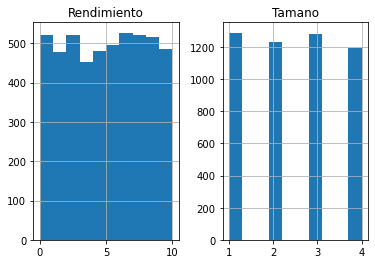

In [10]:
#Visualizamos la distribución de los valores en las columnas numéricas mediante histogramas:
df.hist()
plt.show()

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


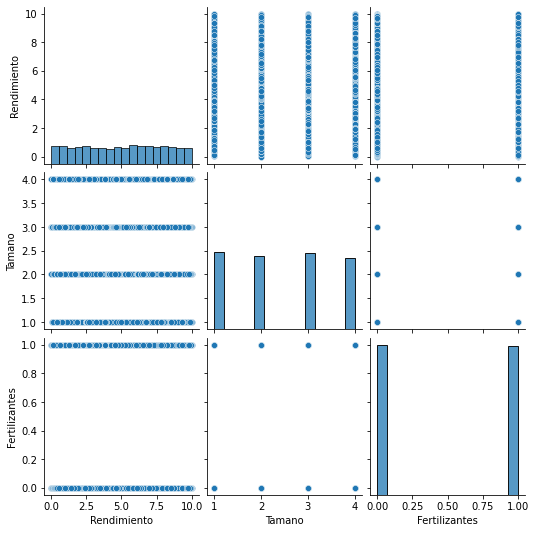

In [11]:
#Exploramos las relaciones entre variables mediante diagramas de dispersión
sns.pairplot(df)
plt.show()

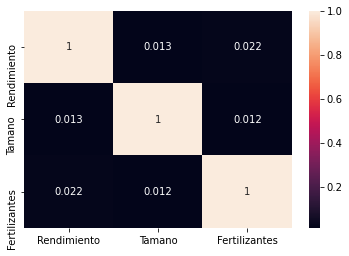

In [12]:
#Calculamos la matriz de correlación entre las variables y visualizarla como un mapa de calor
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()